In [19]:
!pip install autokeras

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import autokeras as ak
from numpy import random

In [21]:
model = tf.keras.models.load_model('../input/d/koyanghsiao/neutrino/neutrino_on_theta13.h5')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 50)                0         
_________________________________________________________________
normalization (Normalization (None, 50)                101       
_________________________________________________________________
dense (Dense)                (None, 1024)              52224     
_________________________________________________________________
re_lu (ReLU)                 (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                32800     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

In [22]:
data = np.load('../input/d/koyanghsiao/neutrino/n1000000chi2_0716.npz')

x_test = data['ve_dune'][900000:]
y_test = data['theta13'][900000:]
pre_test = model.predict(x_test)

ve_dune = data['ve_dune'][0]
ve_dune_std = [0.01*num for num in ve_dune]

In [23]:
data_create = []
for i in range(10000):
    tmp = []
    for i, b in enumerate(ve_dune):
        tmp.append(random.normal(b, ve_dune_std[i]))
    data_create.append(np.array(tmp))

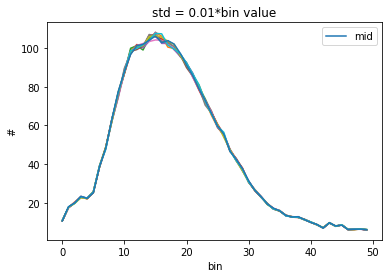

In [24]:
plt.plot(ve_dune, label = 'mid')
for i in range(10):
    plt.plot(data_create[i])
plt.title('std = 0.01*bin value')
plt.xlabel('bin')
plt.ylabel('#')
plt.legend()

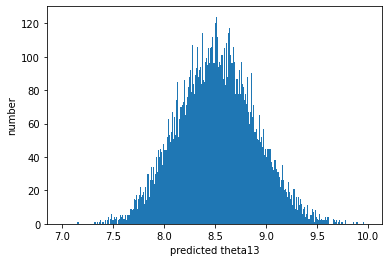

In [49]:
bins = np.arange(7, 10, 0.01)
pre_create = model.predict(np.array(data_create))
plt.hist(pre_create, bins = bins)
plt.xlabel('predicted theta13')
plt.ylabel('number')
plt.show()

In [50]:
from bisect import bisect
from collections import defaultdict

dic = defaultdict(list)
for i, num in enumerate(pre_test):
    dic[bins[bisect(bins, num)]].append(y_test[i])

In [57]:
import random
out = []
for num in pre_create:
    i = bisect(bins, num)
    try:
        out.extend(random.choices(dic[bins[i]], k=20))
    except:
        continue
        out.append([num])

In [70]:
print('dic[489999999999968][:10]: ',  dic[8.489999999999968][:10])


dic[489999999999968][:10]:  [8.51505, 8.36569, 8.68135, 8.43107, 8.39941, 8.29847, 8.52191, 8.3613, 8.43627, 8.60205]


In [1]:
plt.hist(out, bins = bins)
plt.xlabel('predicted theta13')
plt.ylabel('number')
plt.show()

NameError: name 'plt' is not defined

In [63]:
print(len(bins))
print(len(sorted(dic.keys())))

300
239
